# Fluxo Geral
1. Carregamento e Exploração dos Dados
2. Pré-Processamento dos Dados
3. Divisão dos Dados (Treino, Validação e Teste)
4. Treinamento de Modelos
5. Avaliação de Modelos
6. Ajustes e Melhorias
7. Implantação da IA

## Passo 1: Carregamento e Exploração dos Dados

In [12]:
# Carregar os dados
import pandas as pd

dataset_path = "../data/raw/dataset_transacoes.csv"
df = pd.read_csv(dataset_path)

# Visualizar as primeiras linhas
print(df.head())

# Informações gerais sobre os dados
print(df.info())

# Resumo estatístico
print(df.describe())



      numero_cartao  valor_transacao     localizacao tipo_estabelecimento  \
0  4110055622615826       413.354482  Rio de Janeiro    Posto de Gasolina   
1  4289196878064822      1833.574119        Curitiba         Supermercado   
2  4232878082381369      3954.498959  Rio de Janeiro    Posto de Gasolina   
3  4576221403615154       412.296412  Rio de Janeiro           E-commerce   
4  4257343583062204      3518.153885        Curitiba    Posto de Gasolina   

   hora_transacao dia_semana categoria_despesa  idade_titular genero_titular  \
0               4    Segunda        Transporte             37          Outro   
1               4     Quinta       Alimentação             28          Outro   
2              13    Domingo        Transporte             42       Feminino   
3               3     Quarta        Transporte             34       Feminino   
4               4    Domingo       Alimentação             21       Feminino   

  historico_pagamento  limite_credito   saldo_atual  \
0

## Passo 2: Análise Exploratória


### Distribuição das Classes

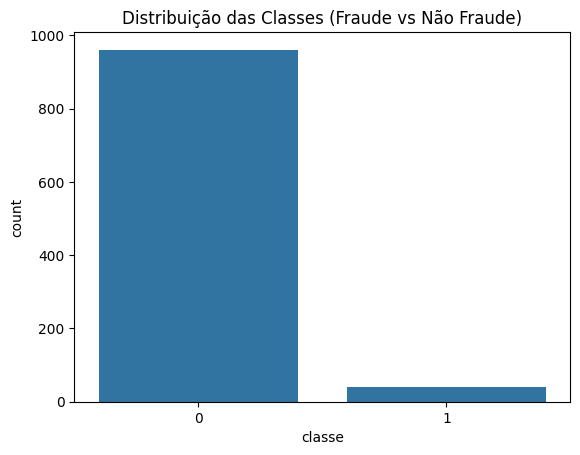

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="classe", data=df)
plt.title("Distribuição das Classes (Fraude vs Não Fraude)")
plt.show()


### Correlação entre Atributos

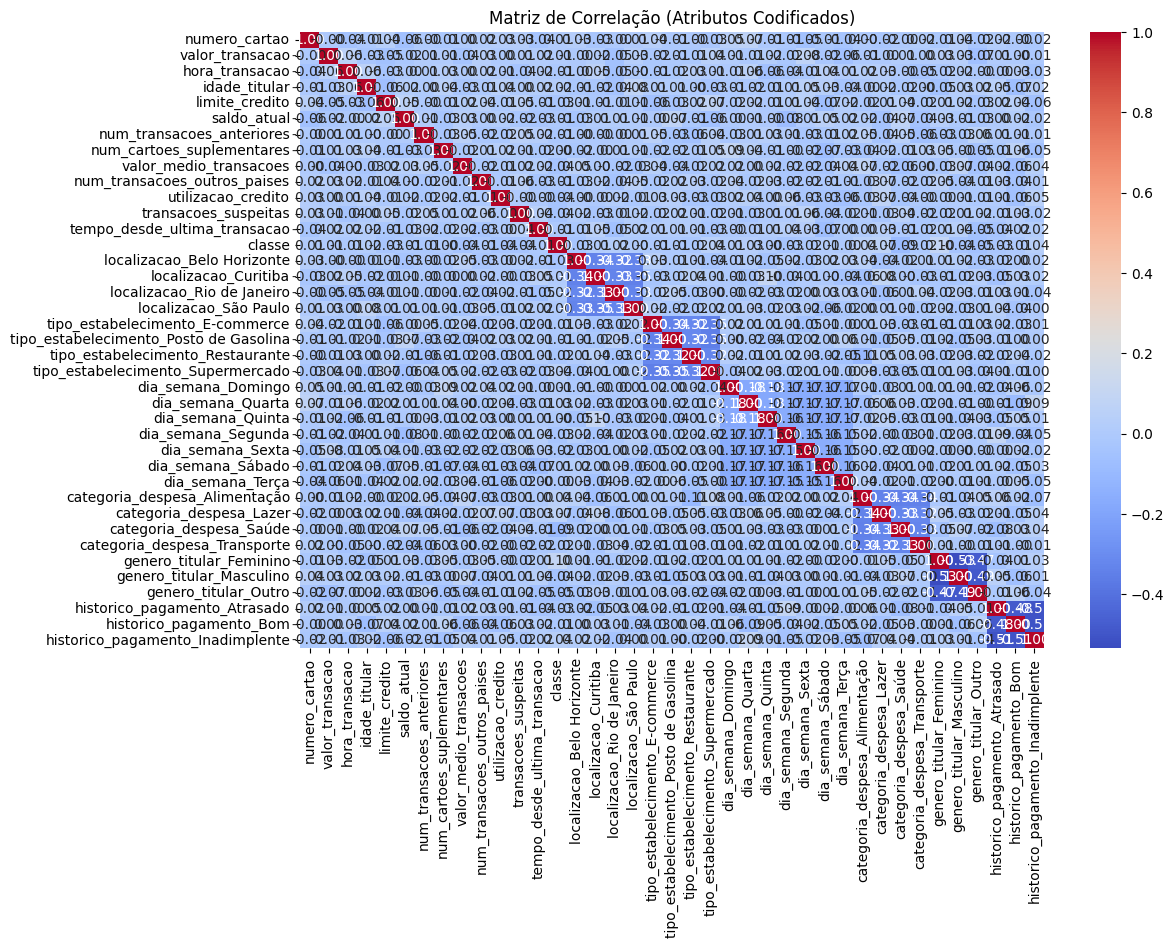

In [24]:
# Identificar colunas categóricas
categorical_cols = ["localizacao", "tipo_estabelecimento", "dia_semana", "categoria_despesa", "genero_titular", "historico_pagamento"]

# Codificar variáveis categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Gerar a matriz de correlação para o DataFrame codificado
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação (Atributos Codificados)")
plt.show()


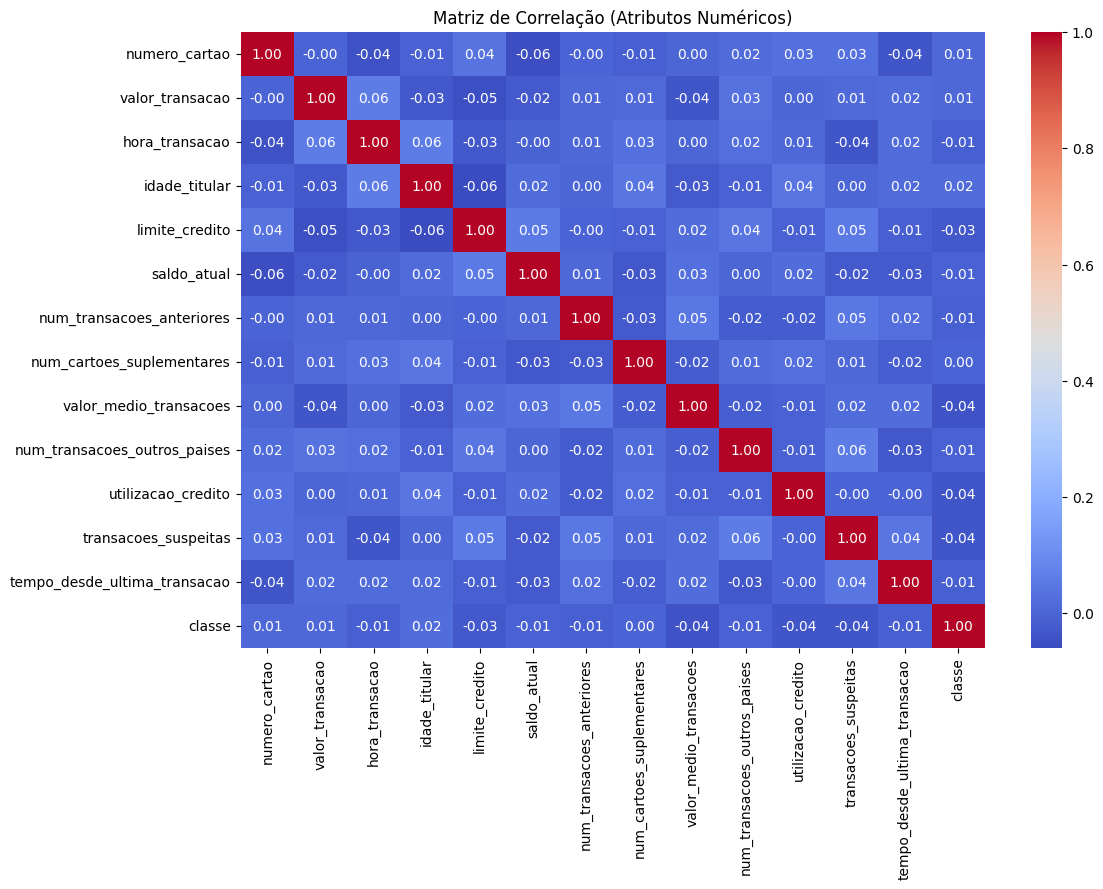

In [25]:
# Selecionar apenas colunas numéricas
numerical_df = df.select_dtypes(include=["number"])

# Gerar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação (Atributos Numéricos)")
plt.show()
